In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt = pd.read_csv("D:/prodi/twitter_training.csv", names=['ID', 'Topic', 'Sentiment', 'Tweet'], header=None)
dt.head(10)

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [4]:
dt.tail(10)

,ID,Topic,Sentiment,Tweet
74672,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74674,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74675,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74676,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
dt.columns

Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [6]:
dt.index

RangeIndex(start=0, stop=74682, step=1)

In [7]:
dt.shape

(74682, 4)

In [8]:
dt.size

298728

In [9]:
dt.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [10]:
dt.isna().sum()

ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
# Define a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [13]:
# Perform sentiment analysis
dt['Polarity'] = dt['Tweet'].apply(analyze_sentiment)

# Categorize sentiment
dt['Sentiment_Label'] = dt['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

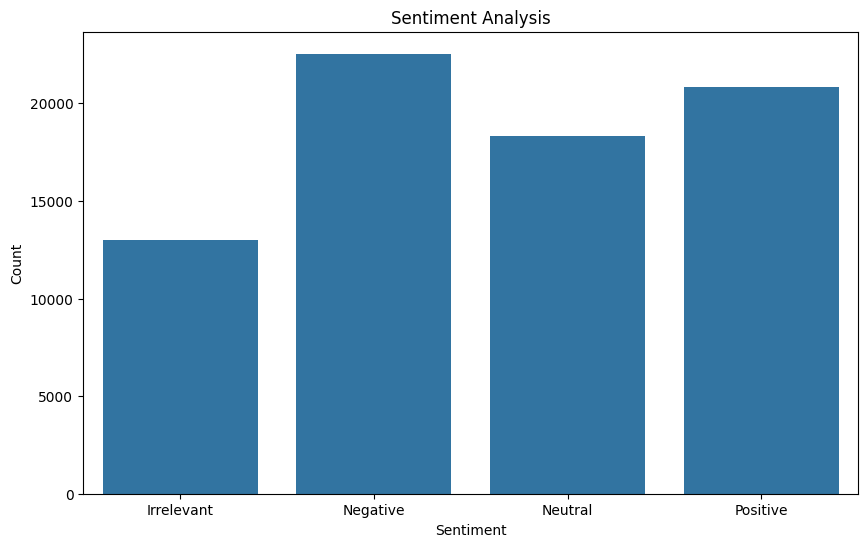

In [14]:
# Convert sentiment labels to categorical data type
dt['Sentiment'] = dt['Sentiment'].astype('category')

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=dt, x='Sentiment')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1500x800 with 0 Axes>

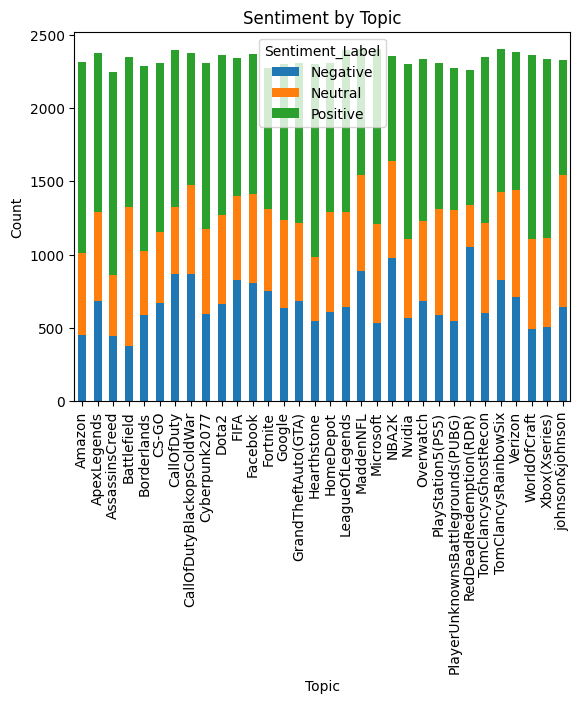

In [15]:
# Analyze sentiment by topic
plt.figure(figsize=(15,8))
sentiment_by_topic = dt.groupby(['Topic', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

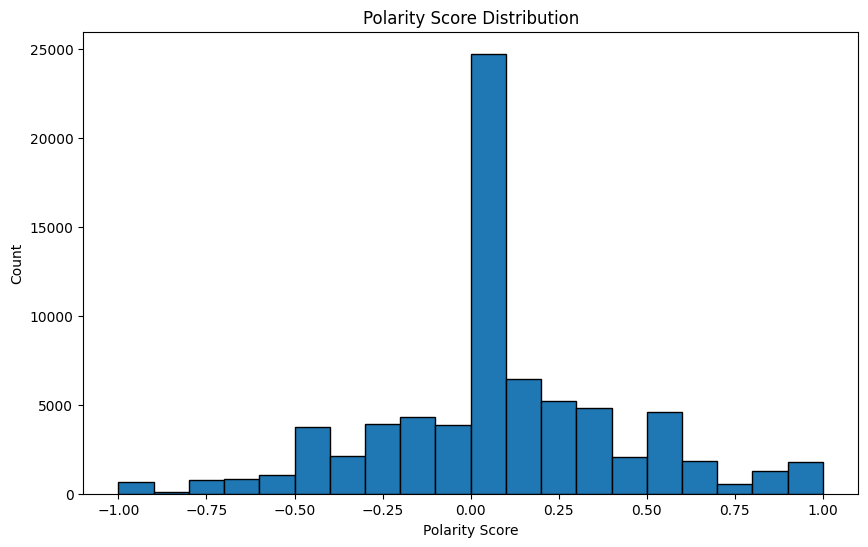

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(dt['Polarity'], bins=20, edgecolor='k')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

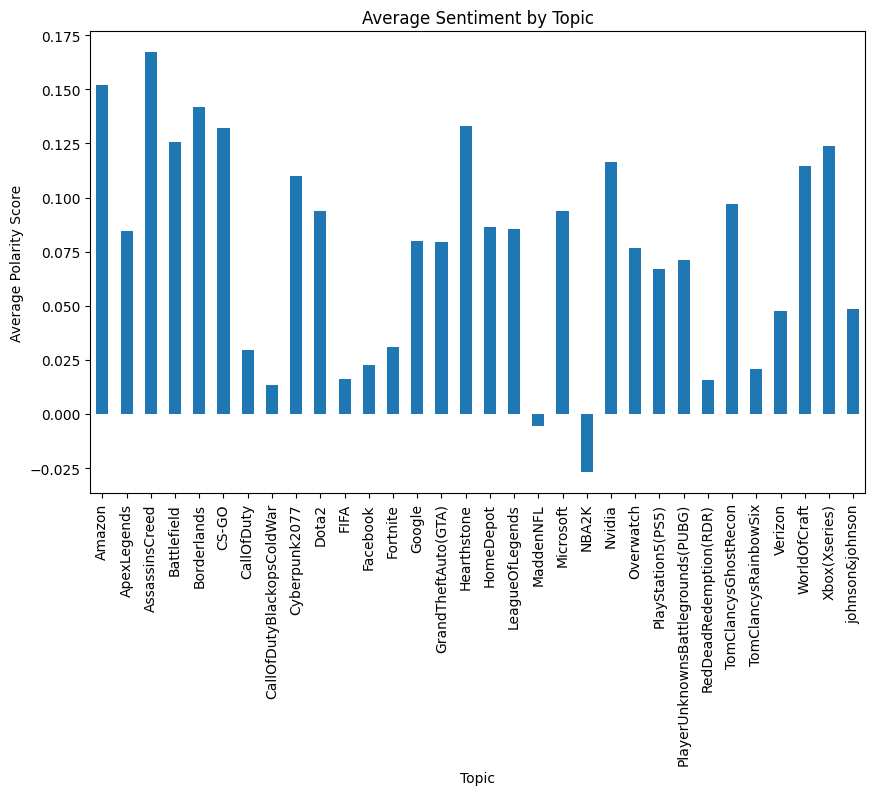

In [17]:
plt.figure(figsize=(10, 6))
average_polarity_by_topic = dt.groupby('Topic')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Polarity Score')
plt.show()

In [19]:
# Visualize the most positive and negative tweets
most_positive_tweet = dt[dt['Polarity'] == dt['Polarity'].max()]['Tweet'].values[0]
most_negative_tweet = dt[dt['Polarity'] == dt['Polarity'].min()]['Tweet'].values[0]

print('Most Positive Tweet:')
print(most_positive_tweet)

print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
Platinum is the best loot @Borderlands  

Most Negative Tweet:
"What terrible bitch!"
